In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## EDA de la fuente nasa

In [ ]:
# Cargar dataset (ajusta ruta si es necesario)
df_nasa = pd.read_csv("nasa_power_llaca_1990_2024.csv", skiprows=21)

In [ ]:
# Crear columna de fecha
df_nasa['DATE'] = pd.to_datetime(df_nasa[['YEAR', 'MO', 'DY']].rename(columns={
    'YEAR': 'year', 'MO': 'month', 'DY': 'day'
}))

In [ ]:
# Reordenar columnas para poner la fecha al inicio
df_nasa = df_nasa[['DATE'] + [col for col in df_nasa.columns if col not in ['DATE']]]

In [ ]:
mapping = {
    'DATE': 'Fecha',
    'YEAR': 'Año',
    'MO': 'Mes',
    'DY': 'Dia',
    'WS2M': 'Velocidad_viento_2m',
    'ALLSKY_SFC_LW_DWN': 'Radiacion_onda_larga_superficie',
    'T2M_MAX': 'Temperatura_máxima_2m',
    'CLRSKY_SFC_SW_DWN': 'Radiacion_cielo_despejado',
    'CLOUD_AMT': 'Cobertura_nubosa',
    'QV2M': 'Humedad_específica_2m',
    'RH2M': 'Humedad_relativa_2m',
    'T2M_MIN': 'Temperatura_minima_2m',
    'T2MDEW': 'Temperatura_punto_de_rocio',
    'TS': 'Temperatura_superficie',
    'T2M': 'Temperatura_2m',
    'ALLSKY_SFC_SW_DWN': 'Radiacion_solar_superficie',
    'PRECTOTCORR': 'Precipitacion_total_corregida'
}

# Renombrar columnas
df = df_nasa.rename(columns=mapping)


In [ ]:
# Convertir variables a numérico (evita errores de lectura)
for col in df.columns:
    if col not in ['Fecha', 'año', 'Mes', 'Dia']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Reemplazar valores faltantes típicos (-999, -9999)
df.replace([-999, -9999], pd.NA, inplace=True)

In [ ]:
# Descripción estadística general
print("Resumen estadístico:")
print(df.describe())

Resumen estadístico:
                Año           Mes           Dia  Velocidad_viento_2m  \
count  12784.000000  12784.000000  12784.000000         12784.000000   
mean    2007.000704      6.522841     15.729897             1.702315   
min     1990.000000      1.000000      1.000000             0.500000   
25%     1998.000000      4.000000      8.000000             1.400000   
50%     2007.000000      7.000000     16.000000             1.640000   
75%     2016.000000     10.000000     23.000000             1.920000   
max     2024.000000     12.000000     31.000000             5.910000   
std       10.100097      3.448862      8.800546             0.450785   

       Radiacion_onda_larga_superficie  Temperatura_máxima_2m  \
count                     12784.000000           12784.000000   
mean                        292.335271              16.312897   
min                         211.000000               6.790000   
25%                         278.490000              15.230000   
50%  

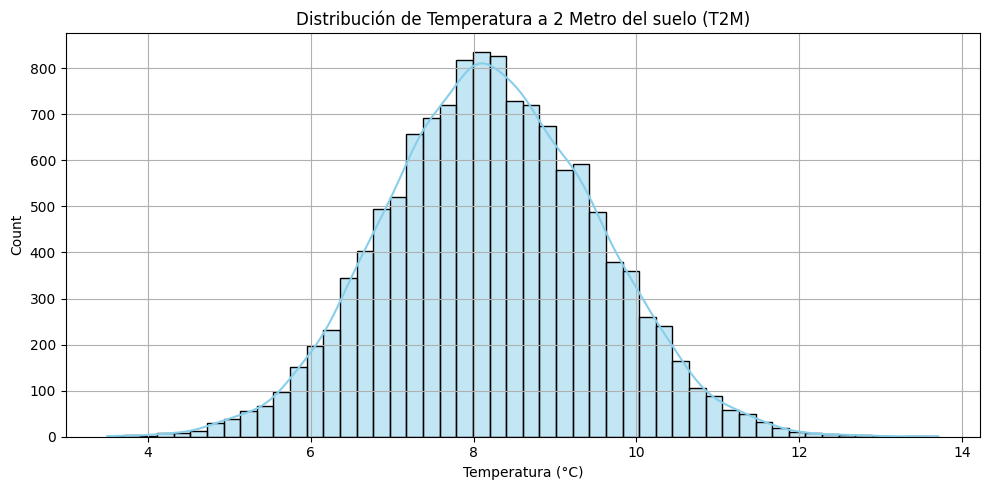

In [ ]:
# --- Visualización 1: Distribución de temperatura promedio ---
plt.figure(figsize=(10, 5))
sns.histplot(df['Temperatura_2m'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Distribución de Temperatura a 2 Metro del suelo (T2M)')
plt.xlabel('Temperatura (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

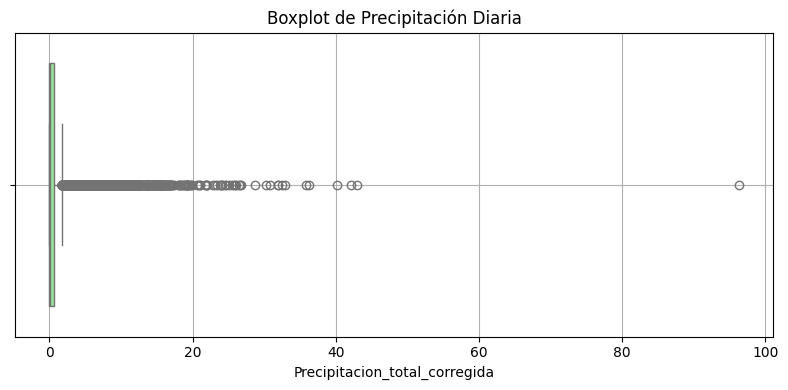

In [ ]:
# --- Visualización 2: Boxplot de precipitación ---
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Precipitacion_total_corregida', color='lightgreen')
plt.title('Boxplot de Precipitación Diaria')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-23-f029ba48bde5>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Año', y='Temperatura_2m', estimator='mean', ci=None)


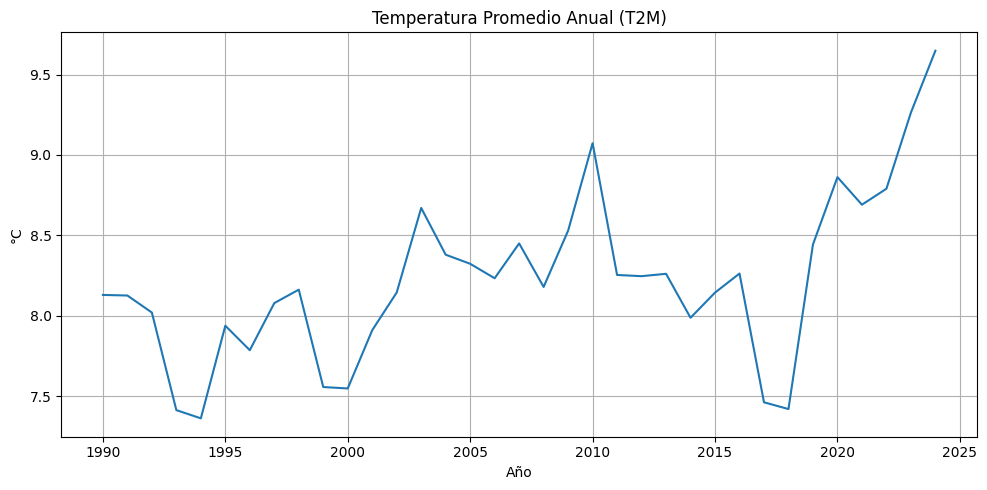

In [ ]:
# --- Visualización 3: Tendencia anual de temperatura ---
df['Año'] = df['Fecha'].dt.year
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Año', y='Temperatura_2m', estimator='mean', ci=None)
plt.title('Temperatura Promedio Anual (T2M)')
plt.ylabel('°C')
plt.xlabel('Año')
plt.grid(True)
plt.tight_layout()
plt.show()

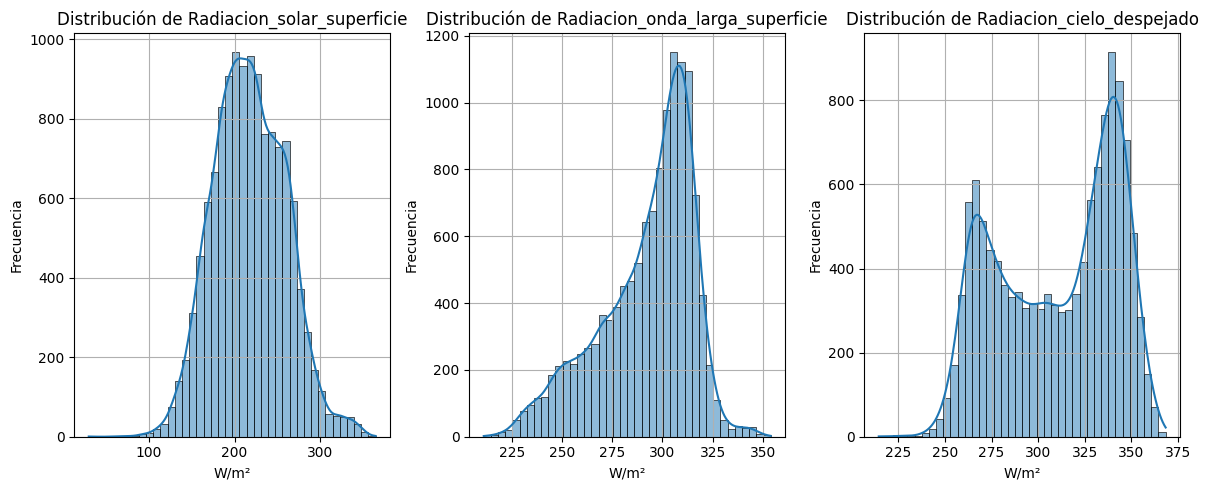

In [ ]:
# --- 2. Histogramas ---

radiacion_cols = ['Radiacion_solar_superficie', 'Radiacion_onda_larga_superficie', 'Radiacion_cielo_despejado']

plt.figure(figsize=(12, 5))
for i, col in enumerate(radiacion_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col].dropna(), bins=40, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel('W/m²')
    plt.ylabel('Frecuencia')
    plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-27-9a97384a854c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Año', y='Radiacion_solar_superficie', estimator='mean', ci=None)


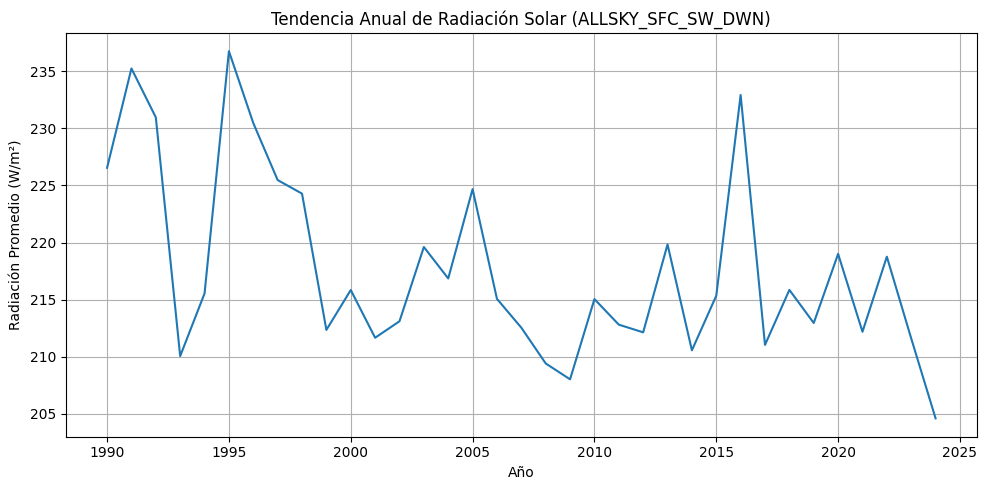

In [ ]:
# --- 3. Serie temporal anual de radiación solar promedio ---
df['Año'] = df['Fecha'].dt.year
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Año', y='Radiacion_solar_superficie', estimator='mean', ci=None)
plt.title('Tendencia Anual de Radiación Solar (ALLSKY_SFC_SW_DWN)')
plt.ylabel('Radiación Promedio (W/m²)')
plt.xlabel('Año')
plt.grid(True)
plt.tight_layout()
plt.show()


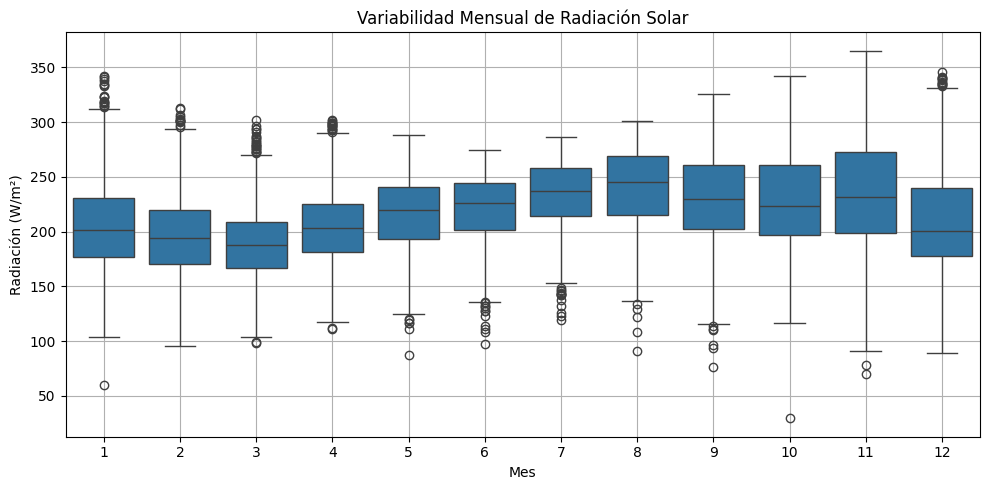

In [ ]:
# --- 4. Boxplot mensual ---
df['Mes'] = df['Fecha'].dt.month
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Mes', y='Radiacion_solar_superficie')
plt.title('Variabilidad Mensual de Radiación Solar')
plt.xlabel('Mes')
plt.ylabel('Radiación (W/m²)')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-29-7ad337a108da>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({pd.NA: np.nan})


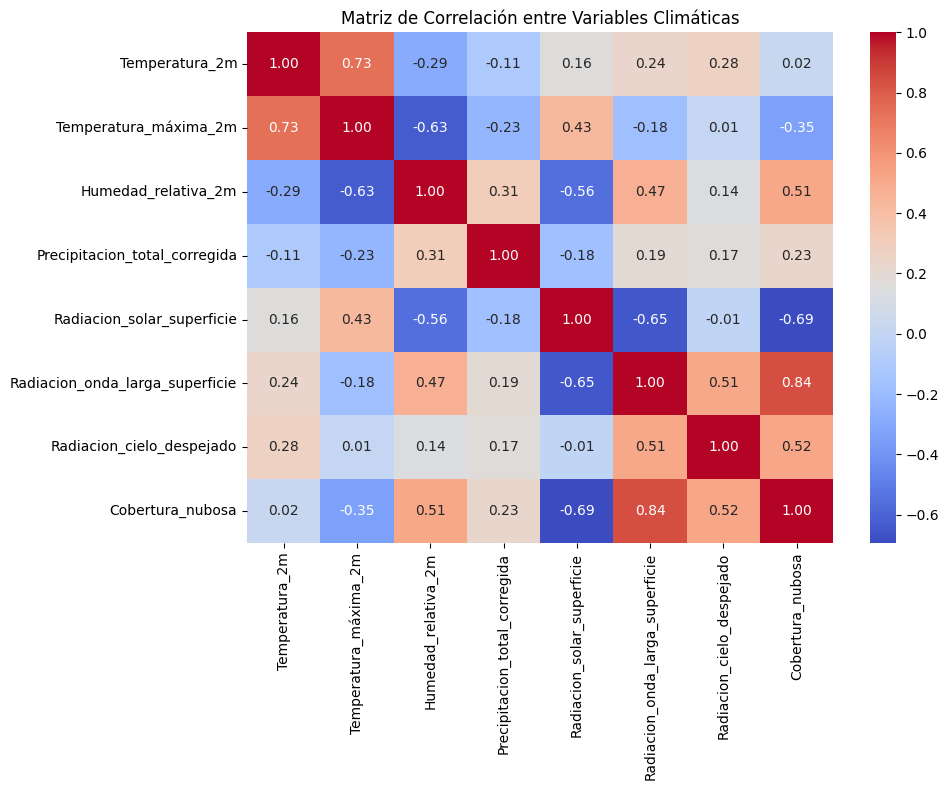

In [ ]:
# Asegurarse de que los valores faltantes sean np.nan
df = df.replace({pd.NA: np.nan})

# Definir variables (ajustadas a columnas reales)
variables = [col for col in [
    'Temperatura_2m', 'Temperatura_máxima_2m', 'Temperatura_mínima_2m', 'Humedad_relativa_2m', 'Precipitacion_total_corregida',
    'Radiacion_solar_superficie', 'Radiacion_onda_larga_superficie', 'Radiacion_cielo_despejado', 'Cobertura_nubosa'
] if col in df.columns]

# Calcular matriz de correlación
correlacion = df[variables].corr()

# Graficar
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Climáticas')
plt.tight_layout()
plt.show()

### Análisis de la Matriz de Correlación: Selección de Variables para el Modelo Predictivo

En base a la matriz de correlación obtenida, se identificaron las variables climáticas con mayor relación entre sí, lo cual permite definir con mayor criterio qué variables usar como independientes en el modelo predictivo de la tasa de retroceso del glaciar Llaca.

#### Hallazgos clave:

- **Temperatura mínima (`T2M_MIN`)** tiene correlaciones positivas importantes con la radiación de onda larga (`ALLSKY_SFC_LW_DWN`, 0.62) y la radiación bajo cielo despejado (`CLRSKY_SFC_SW_DWN`, 0.47). Esto sugiere que los días con mayor retención energética nocturna tienden a mantener temperaturas mínimas elevadas, lo cual reduce la recuperación glaciar nocturna.

- **Cobertura nubosa (`CLOUD_AMT`)** muestra una correlación positiva alta con `ALLSKY_SFC_LW_DWN (0.84)` y `CLRSKY_SFC_SW_DWN (0.52)`. Las nubes tienden a bloquear la radiación de onda corta, pero aumentan la radiación de onda larga (efecto invernadero local), acelerando la fusión glaciar.

- **Temperatura máxima (`T2M_MAX`)** está relacionada con `ALLSKY_SFC_SW_DWN (0.43)`, lo que indica que una mayor radiación solar se asocia con mayores temperaturas diurnas, contribuyendo al derretimiento glaciar.

#### Variables independientes recomendadas para el modelo:

| Variable                 | Justificación técnica |
|--------------------------|------------------------|
| `T2M`, `T2M_MAX`, `T2M_MIN` | Variables térmicas claves para modelar ablación glaciar. |
| `ALLSKY_SFC_SW_DWN`      | Radiación solar directa, relacionada con la fusión superficial. |
| `ALLSKY_SFC_LW_DWN`      | Radiación de onda larga, asociada al efecto invernadero. |
| `CLRSKY_SFC_SW_DWN`      | Radiación bajo cielo despejado, ideal para contrastes térmicos. |
| `CLOUD_AMT`              | Cobertura nubosa que influye directamente en el balance energético. |
| `RH2M`                   | Humedad relativa, útil para modelar procesos de sublimación o condensación. |

Estas variables serán utilizadas como entrada (*features*) en el modelo de *machine learning* para predecir la variable dependiente: **tasa de retroceso glaciar** (que será construida a partir de registros del monitoreo glaciológico directo, indirecto y satelital).

---


## EDA fuente camara low cost

In [5]:
FILE_PATH = 'sensor_and_environmental_data-10min_yearly.csv'
df = pd.read_csv(FILE_PATH, parse_dates=['timestamp'])

df = df.rename(columns={
    'temperature_C':   'temperature_c',
    'humidity_%':      'humidity_pct',
    'pressure_hPa':    'pressure_hpa',
    'radiation_W/m²':  'radiation_wm2',
    'battery_V':       'battery_v',
    'memory_used_MB':  'memory_used_mb'
})

df

,timestamp,latitude,longitude,altitude_m,temperature_c,humidity_pct,pressure_hpa,radiation_wm2,battery_v,memory_used_mb,event_log
0,2024-05-24 23:06:43,-9.383044,-77.526004,4600,-9.8,55.2,665.2,284.4,12.16,169.7,SENSOR_FAIL
1,2024-05-24 23:16:43,-9.382944,-77.526015,4600,2.3,81.3,693.3,345.3,11.61,144.9,SENSOR_FAIL
2,2024-05-24 23:26:43,-9.383063,-77.526078,4600,-5.3,85.1,658.7,384.6,12.25,125.5,RESTART
3,2024-05-24 23:36:43,-9.382902,-77.526091,4600,-4.5,82.0,654.4,237.7,11.72,120.5,OK
4,2024-05-24 23:46:43,-9.383023,-77.526099,4600,3.9,70.9,659.2,119.3,12.05,181.8,SENSOR_FAIL
...,...,...,...,...,...,...,...,...,...,...,...
52556,2025-05-24 22:26:43,-9.382976,-77.526063,4600,-9.3,88.8,650.7,397.6,12.39,161.4,OK
52557,2025-05-24 22:36:43,-9.382981,-77.526036,4600,-5.7,76.3,685.2,368.6,12.31,144.4,RESTART
52558,2025-05-24 22:46:43,-9.383065,-77.525925,4600,-9.2,78.4,671.2,192.0,12.16,199.4,SENSOR_FAIL
52559,2025-05-24 22:56:43,-9.383092,-77.526064,4600,-4.8,76.7,678.9,206.7,12.14,151.6,SENSOR_FAIL


In [6]:
print("Dimensiones:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nPrimeras filas:\n", df.head())

Dimensiones: (52561, 11)

Tipos de datos:
 timestamp         datetime64[ns]
latitude                 float64
longitude                float64
altitude_m                 int64
temperature_c            float64
humidity_pct             float64
pressure_hpa             float64
radiation_wm2            float64
battery_v                float64
memory_used_mb           float64
event_log                 object
dtype: object

Primeras filas:
             timestamp  latitude  longitude  altitude_m  temperature_c  \
0 2024-05-24 23:06:43 -9.383044 -77.526004        4600           -9.8   
1 2024-05-24 23:16:43 -9.382944 -77.526015        4600            2.3   
2 2024-05-24 23:26:43 -9.383063 -77.526078        4600           -5.3   
3 2024-05-24 23:36:43 -9.382902 -77.526091        4600           -4.5   
4 2024-05-24 23:46:43 -9.383023 -77.526099        4600            3.9   

   humidity_pct  pressure_hpa  radiation_wm2  battery_v  memory_used_mb  \
0          55.2         665.2          284.4    

In [7]:
missing = df.isna().sum().to_frame(name='n_missing')
missing['pct_missing'] = 100 * missing['n_missing'] / len(df)
print("\nValores faltantes por columna:\n", missing)


Valores faltantes por columna:
                 n_missing  pct_missing
timestamp               0          0.0
latitude                0          0.0
longitude               0          0.0
altitude_m              0          0.0
temperature_c           0          0.0
humidity_pct            0          0.0
pressure_hpa            0          0.0
radiation_wm2           0          0.0
battery_v               0          0.0
memory_used_mb          0          0.0
event_log               0          0.0


In [8]:
print("\nDescribe:\n", df.describe(include='all').T)


Describe:
                   count unique          top   freq  \
timestamp         52561    NaN          NaN    NaN   
latitude        52561.0    NaN          NaN    NaN   
longitude       52561.0    NaN          NaN    NaN   
altitude_m      52561.0    NaN          NaN    NaN   
temperature_c   52561.0    NaN          NaN    NaN   
humidity_pct    52561.0    NaN          NaN    NaN   
pressure_hpa    52561.0    NaN          NaN    NaN   
radiation_wm2   52561.0    NaN          NaN    NaN   
battery_v       52561.0    NaN          NaN    NaN   
memory_used_mb  52561.0    NaN          NaN    NaN   
event_log         52561      3  SENSOR_FAIL  17607   

                                         mean                  min  \
timestamp       2024-11-23 11:06:43.000000256  2024-05-24 23:06:43   
latitude                               -9.383              -9.3831   
longitude                             -77.526             -77.5261   
altitude_m                             4600.0              

In [9]:
df = df.sort_values('timestamp').set_index('timestamp')
delta = df.index.to_series().diff().mode()[0]
print("\nIntervalo de muestreo más frecuente:", delta)


Intervalo de muestreo más frecuente: 0 days 00:10:00


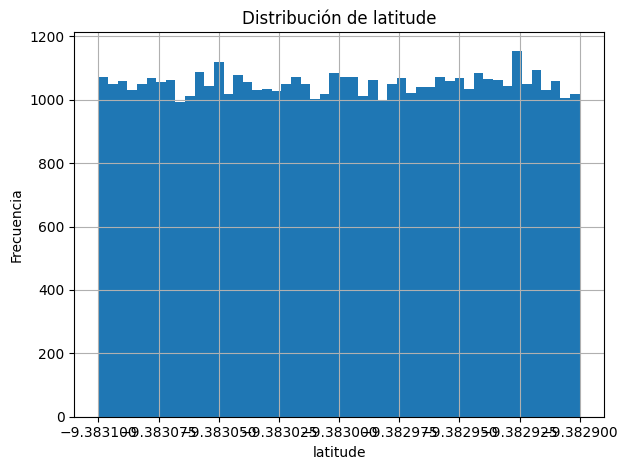

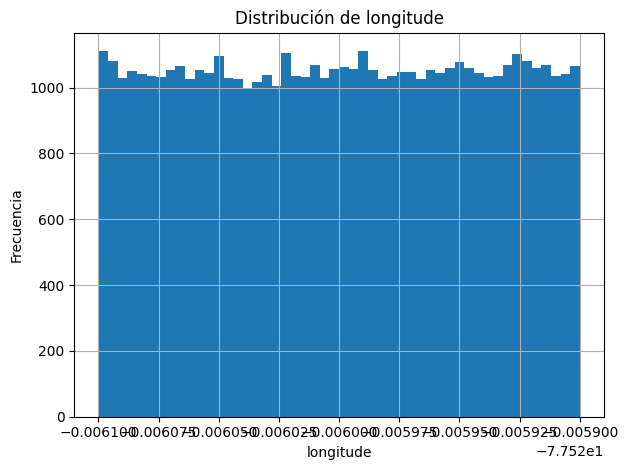

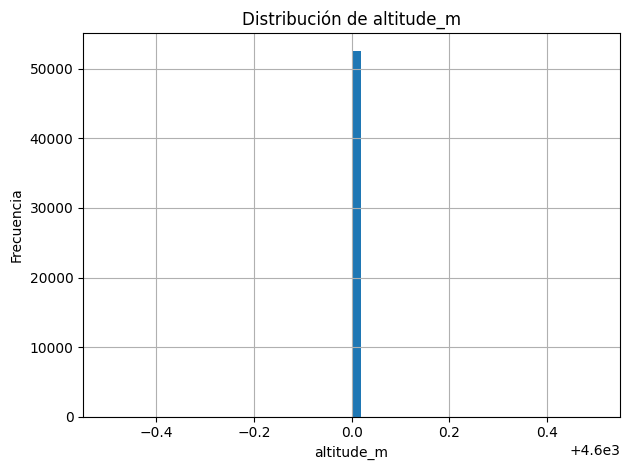

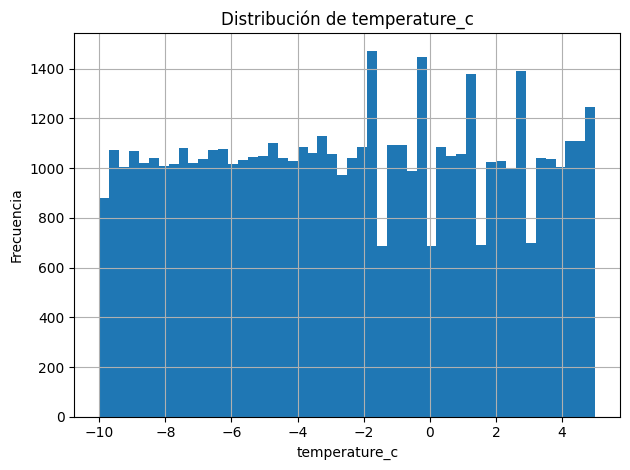

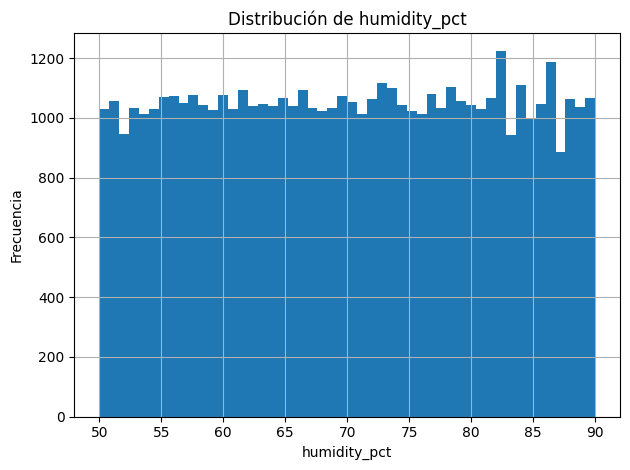

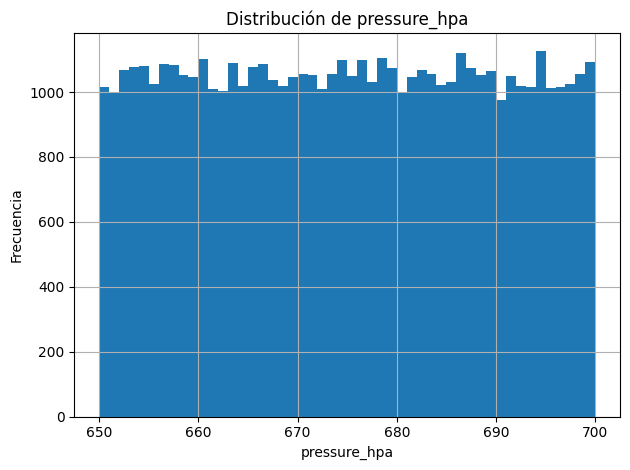

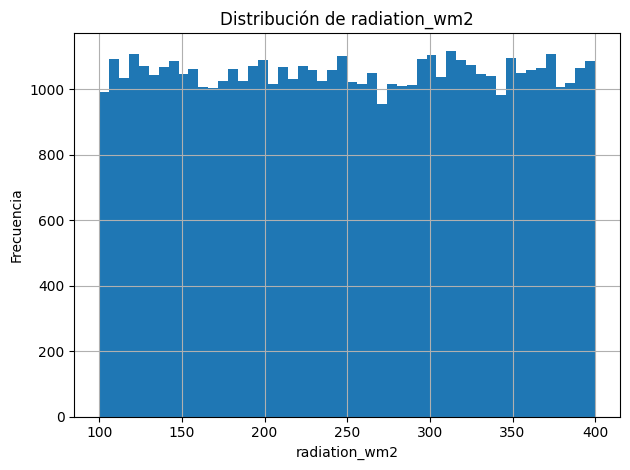

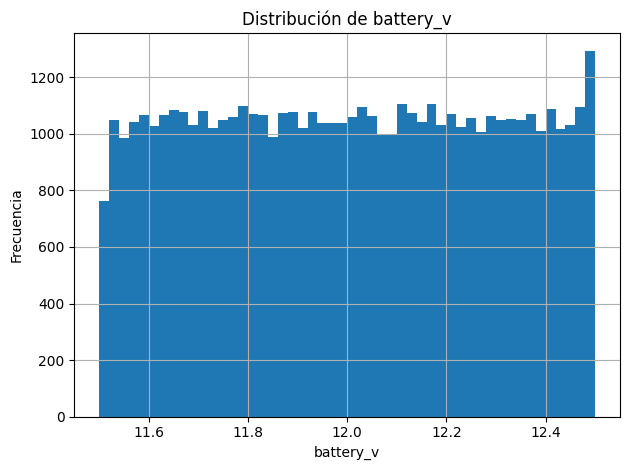

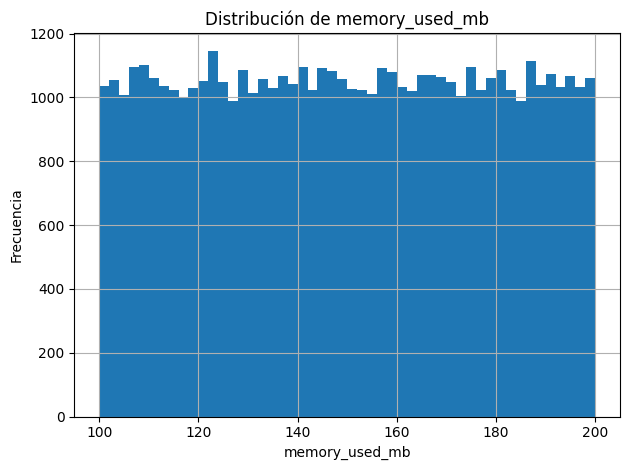

In [10]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure()
    df[col].hist(bins=50)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()

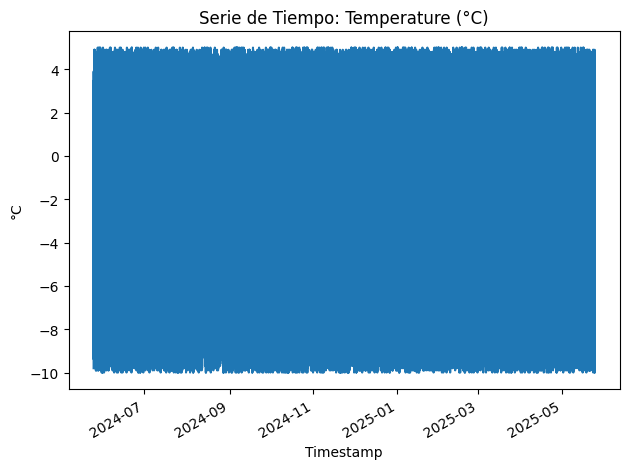

In [11]:
plt.figure()
df['temperature_c'].plot()
plt.title('Serie de Tiempo: Temperature (°C)')
plt.ylabel('°C')
plt.xlabel('Timestamp')
plt.tight_layout()

In [12]:
corr = df[num_cols].corr()
print("\nCorrelaciones:\n", corr)


Correlaciones:
                 latitude  longitude  altitude_m  temperature_c  humidity_pct  \
latitude        1.000000   0.011176         NaN      -0.001460      0.001222   
longitude       0.011176   1.000000         NaN       0.000422      0.001363   
altitude_m           NaN        NaN         NaN            NaN           NaN   
temperature_c  -0.001460   0.000422         NaN       1.000000     -0.000986   
humidity_pct    0.001222   0.001363         NaN      -0.000986      1.000000   
pressure_hpa    0.003969   0.002725         NaN      -0.002821     -0.002761   
radiation_wm2  -0.004384  -0.004942         NaN      -0.005963      0.000288   
battery_v      -0.003074  -0.004457         NaN      -0.005043      0.001546   
memory_used_mb -0.001000   0.004987         NaN       0.000920     -0.006441   

                pressure_hpa  radiation_wm2  battery_v  memory_used_mb  
latitude            0.003969      -0.004384  -0.003074       -0.001000  
longitude           0.002725      -0

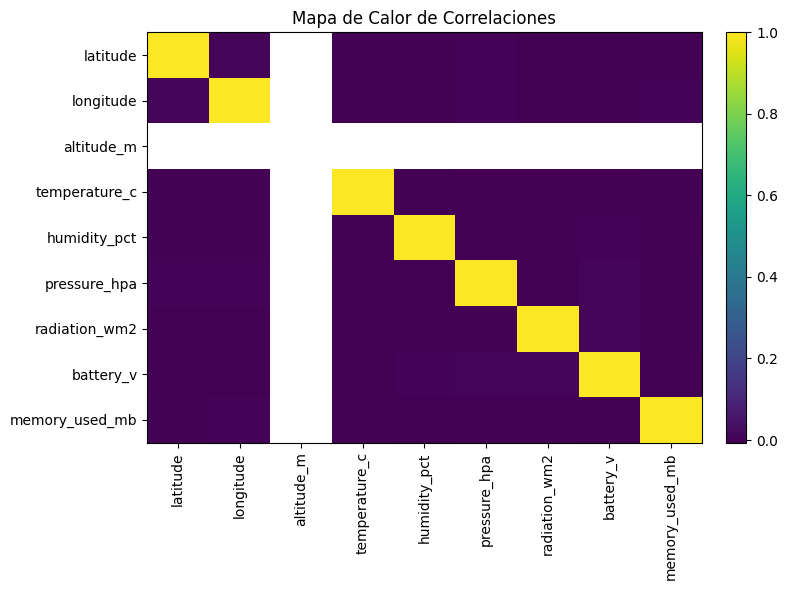

In [13]:
plt.figure(figsize=(8,6))
im = plt.imshow(corr, interpolation='none', aspect='auto')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Mapa de Calor de Correlaciones')
plt.tight_layout()